In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# import the statistical tests we'll use from the library scipy
from scipy.stats import pearsonr, spearmanr, shapiro, ttest_ind, ttest_rel, norm


# Let's use the e-commerce dataset

In [ ]:
# all files are avaliable as csv here:https://github.com/AlineQuadros/stats_class/tree/main/datasets

# ORDERS table

orders = pd.read_csv("https://github.com/sarahlbe/redi/blob/main/olist_orders_dataset.csv?raw=True")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,number_items_in_order,category_first_item_in_order,categories_all_items_in_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,housewares,['housewares']
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,perfumery,['perfumery']
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,auto,['auto']
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,pet_shop,['pet_shop']
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,stationery,['stationery']


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_approved_at              99281 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  99441 non-null  object 
 8   number_items_in_order          98666 non-null  float64
 9   category_first_item_in_order   97256 non-null  object 
 10  categories_all_items_in_order  98666 non-null  object 
dtypes: float64(1), object(10)
memory usage: 8.3+ MB


In [ ]:
# table showing the products per order
prod = pd.read_csv("https://github.com/AlineQuadros/stats_class/blob/main/datasets/olist_order_items_dataset.csv?raw=True")
prod.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:

# customers
cust = pd.read_csv("https://github.com/sarahlbe/redi/blob/main/olist_customers_dataset.csv?raw=True")
cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:

# products
prod = pd.read_csv("https://github.com/AlineQuadros/stats_class/blob/main/datasets/olist_products_dataset.csv?raw=True")
prod.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
print('shape of table:', orders.shape)
print('number of unique customer_ids:', orders.customer_id.nunique())
print('\ncount of purchases categories:')
print(orders.category_first_item_in_order.value_counts()[:10])

shape of table: (99441, 11)
number of unique customer_ids: 99441

count of purchases categories:
bed_bath_table           9315
health_beauty            8796
sports_leisure           7683
computers_accessories    6661
furniture_decor          6355
housewares               5836
watches_gifts            5601
telephony                4182
auto                     3881
toys                     3862
Name: category_first_item_in_order, dtype: int64


## Let's analize the deliveries in more detail

In [ ]:
delivery_stats = orders[orders.order_status=='delivered']
delivery_stats

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,number_items_in_order,category_first_item_in_order,categories_all_items_in_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,housewares,['housewares']
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,perfumery,['perfumery']
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,auto,['auto']
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,pet_shop,['pet_shop']
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,stationery,['stationery']
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1.0,health_beauty,['health_beauty']
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,baby,['baby']
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,home_appliances_2,['home_appliances_2']
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,computers_accessories,"['computers_accessories', 'computers_accessori..."


In [ ]:
delivery_stats = pd.merge(delivery_stats, cust[['customer_id', 'customer_city']], on='customer_id', how='left')

In [ ]:
delivery_stats.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,number_items_in_order,category_first_item_in_order,categories_all_items_in_order,delivery_time_d,delivery_delay_d,delivery_to_carrier_h,order_month,order_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,housewares,['housewares'],6.0,-8.0,56.795833,10,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,perfumery,['perfumery'],12.0,-6.0,11.109167,7,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,auto,['auto'],9.0,-18.0,4.910278,8,2018


In [ ]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [ ]:
delivery_stats.loc[:, 'delivery_time_d'] = (orders['order_delivered_customer_date']-orders['order_delivered_carrier_date']).dt.days
delivery_stats.loc[:, 'delivery_delay_d'] = (orders['order_delivered_customer_date']-orders['order_estimated_delivery_date']).dt.days
delivery_stats.loc[:, 'delivery_to_carrier_h'] = ((orders['order_delivered_carrier_date']-orders['order_approved_at']))/pd.Timedelta('1 hour')
delivery_stats.loc[:, 'order_month'] = orders['order_purchase_timestamp'].dt.month
delivery_stats.loc[:, 'order_year'] = orders['order_purchase_timestamp'].dt.year
#delivery_stats.loc[:, 'delivery_time_d']
#delivery_stats.loc[:, 'delivery_delay_d']
#delivery_stats.loc[:, 'delivery_to_carrier_h']
#delivery_stats.loc[:, 'order_month']
#delivery_stats.loc[:, 'order_year']

<ipython-input-27-59156e225e75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_stats.loc[:, 'delivery_time_d'] = (orders['order_delivered_customer_date']-orders['order_delivered_carrier_date']).dt.days
<ipython-input-27-59156e225e75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_stats.loc[:, 'delivery_delay_d'] = (orders['order_delivered_customer_date']-orders['order_estimated_delivery_date']).dt.days
<ipython-input-27-59156e225e75>:3: SettingWithCopyWarning: 
A value is trying to be 

In [ ]:
delivery_stats

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,number_items_in_order,category_first_item_in_order,categories_all_items_in_order,delivery_time_d,delivery_delay_d,delivery_to_carrier_h,order_month,order_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,housewares,['housewares'],6.0,-8.0,56.795833,10,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,perfumery,['perfumery'],12.0,-6.0,11.109167,7,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,auto,['auto'],9.0,-18.0,4.910278,8,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,pet_shop,['pet_shop'],9.0,-13.0,89.900000,11,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,stationery,['stationery'],1.0,-10.0,21.434722,2,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1.0,health_beauty,['health_beauty'],7.0,-11.0,25.399444,3,2017
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,baby,['baby'],20.0,-2.0,34.201389,2,2018
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,home_appliances_2,['home_appliances_2'],23.0,-6.0,29.802778,8,2017
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,computers_accessories,"['computers_accessories', 'computers_accessori...",13.0,-21.0,89.978333,1,2018


In [ ]:
delivery_stats.dropna(inplace=True)
delivery_stats

<ipython-input-21-2d1b3cc72694>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_stats.dropna(inplace=True)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,number_items_in_order,category_first_item_in_order,categories_all_items_in_order,delivery_time_d,delivery_delay_d,delivery_to_carrier_h,order_month,order_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,housewares,['housewares'],6.0,-8.0,56.795833,10,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,perfumery,['perfumery'],12.0,-6.0,11.109167,7,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,auto,['auto'],9.0,-18.0,4.910278,8,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,pet_shop,['pet_shop'],9.0,-13.0,89.900000,11,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,stationery,['stationery'],1.0,-10.0,21.434722,2,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1.0,health_beauty,['health_beauty'],7.0,-11.0,25.399444,3,2017
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,baby,['baby'],20.0,-2.0,34.201389,2,2018
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,home_appliances_2,['home_appliances_2'],23.0,-6.0,29.802778,8,2017
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,computers_accessories,"['computers_accessories', 'computers_accessori...",13.0,-21.0,89.978333,1,2018


Along the months, what is the average time (in days) of the deliveries?

In [ ]:
delivery_stats.groupby(['order_year', 'order_month']).agg({'delivery_time_d':'mean', 'order_id':'nunique'})

delivery_time_d  order_id
order_year order_month                           
2016       9                   1.000000         1
           10                  5.406844       263
           12                  1.000000         1
2017       1                   8.794038       738
           2                   9.157035      1592
           3                   9.409054      2496
           4                  10.725123      2241
           5                   7.870130      3465
           6                   8.482166      3084
           7                   8.051778      3824
           8                   7.593122      4129
           9                   8.163081      4090
           10                  7.958898      4428
           11                 10.595463      7186
           12                 11.157347      5383
2018       1                   9.978119      6901
           2                  12.879070      6450
           3                  12.462522      6884
           4                   8.191651      6731
           5                   8.403634      6714
           6                   6.356543      6075
           7                   5.809820      6110
           8                   4.875455      6319

In [ ]:
delivery_stats.groupby(['customer_city']).agg({'delivery_time_d':'mean', 'order_id':'nunique'}).sort_values('order_id', ascending=False).head(30)

KeyError: ignored



---



---



### Let's add more data to the tables and look at some KPIs

In [ ]:
# payments
pay = pd.read_csv("https://github.com/AlineQuadros/stats_class/blob/main/datasets/olist_order_payments_dataset.csv?raw=True")

pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
len(pay)

103886

In [ ]:
pay = pay.groupby('order_id')['payment_value'].sum().reset_index()
pay.head(3)

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87


In [ ]:
delivery_stats = pd.merge(delivery_stats, pay, on='order_id', how='left')

In [ ]:
# AOV = Average order value
pay.payment_value.mean()

160.9902666934835

In [ ]:
delivery_stats.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,number_items_in_order,category_first_item_in_order,categories_all_items_in_order,delivery_time_d,delivery_delay_d,delivery_to_carrier_h,order_month,order_year,payment_value
90858,ef71d3927bb2fecd198389f0c4b8044e,dcb03d3213278d10ed9353e099845a66,delivered,2017-05-24 03:51:41,2017-05-24 04:41:05,2017-05-29 08:05:46,2017-05-30 09:25:05,2017-06-06 00:00:00,1.0,telephony,['telephony'],1.0,-7.0,123.411389,5,2017,26.68
34107,3202ed2f2aeb0f12728c23faf6b61bf8,3f746b19aced0452de93862d6ddef4ab,delivered,2018-05-03 23:59:21,2018-05-04 00:13:31,2018-05-04 14:19:00,2018-05-09 19:47:51,2018-05-28 00:00:00,1.0,auto,['auto'],5.0,-19.0,14.091389,5,2018,68.23
53261,8056f3074c90b0bec67d3d71a204562c,8a89e4273435c16dd1d56d19e7670520,delivered,2018-02-23 16:23:54,2018-02-24 02:50:47,2018-02-26 20:08:49,2018-02-28 20:25:25,2018-03-09 00:00:00,1.0,office_furniture,['office_furniture'],2.0,-9.0,65.300556,2,2018,134.24


In [ ]:
len(delivery_stats)

95105

# Correlations

So far we've been looking at ways to summarize each variable individually. With correlations, we can understand relationships in the data.

When a correlation exists between 2 variables, it can be positive or negative.

To measure the strenght of the correlation, we can use **correlation coefficients**:


1.   For symmetrical distributions, it is usually safe to use [Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
2.   For asymmetrical distributions, it is usually more appropriate to use [Spearman's correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)





<img src="https://cdn1.byjus.com/wp-content/uploads/2021/03/Correlation.png" width="400" />


## How can we check if correlations are statistically significant?

We can use **hypothesis tests**. In this case, the **null hypotesis** is that the coefficient of correlation is, in fact, equal to zero. If the p-value is small enough, we can reject the null hypothesis and say that the coefficient of correlation that we encountered in the data, is **statistically significant**


### When the data is normally distributed, we can use a test called **Pearson's correlation**, and when it is not, it is better to use another test, called **Spearman's correlation**.

### The correlation coefficient ranges from -1 to +1. Zero mean there's no correlation.



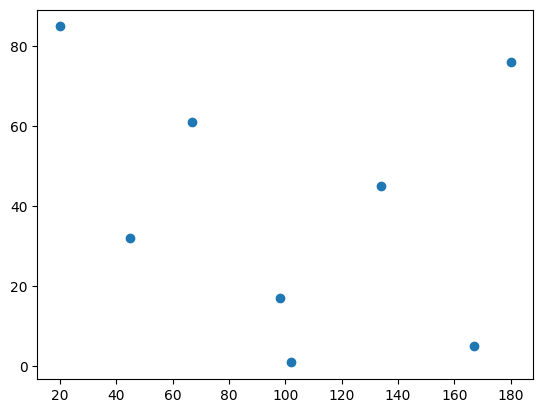

In [ ]:
A = [20, 45, 67, 98, 102, 134, 167, 180]
#B = [18, 43, 61, 97, 112, 130, 160, 176]
B = [85, 32, 61, 17, 1, 45, 5, 76]

plt.scatter(A, B)

In [ ]:

# example Pearson - for normally distributed data
corr_coeficient, pvalue = pearsonr(A, B)
print("Pearson's correlation: %.3f" % corr_coeficient)

Pearson's correlation: -0.251


In [ ]:
pvalue

0.5485245396814049

In [ ]:
# example Spearman - for non-gaussian data
corr_coeficient, pvalue = spearmanr(A, B)
print("Spearman's correlation: %.3f" % corr_coeficient)

Spearman's correlation: -0.262


### What do you think the pvalue is going to be? Lower or higher than 0.05?

## Is there a correlation between the delivery time (to the carrier) and the order value? Do you think the company prioritize and ships expensive orders before the others?

In [ ]:
# let's drop missing values
delivery_stats.dropna(inplace=True)

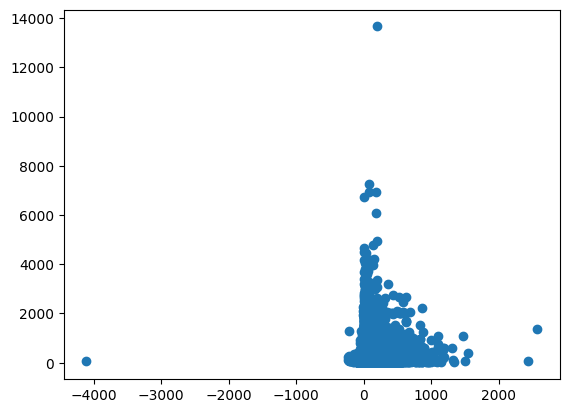

In [ ]:
plt.scatter(delivery_stats.delivery_to_carrier_h, delivery_stats.payment_value)

In [ ]:
# what should we do about the outliers?

In [ ]:
# example
corr_coeficient, pvalue = spearmanr(delivery_stats.delivery_time_d, delivery_stats.payment_value)
print("Spearman's correlation coefficient: %.3f" % corr_coeficient)

Spearman's correlation coefficient: 0.128


In [ ]:
pvalue

0.0

## Is there a correlation between the **length of a product description** and the product's **sales**?
product sales = number of units of product sold





---


---



---




# Let's look at another dataset

### Here's characteristics of apartments for rent in Berlin.
**Is there a correlation between the size of the apartment and it's price?**

In [ ]:
# Read in dataset
rentals = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv")
rentals.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27


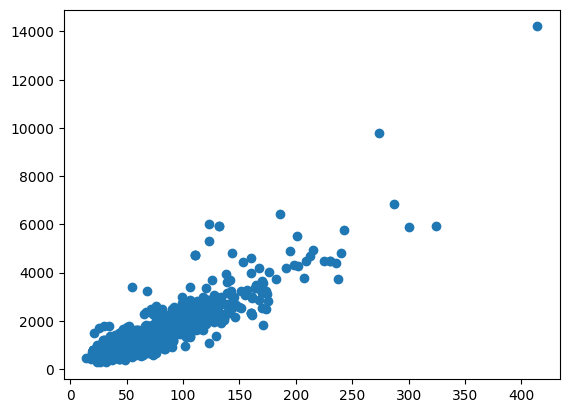

In [ ]:
plt.scatter(rentals.Space, rentals.Rent)

<Axes: >

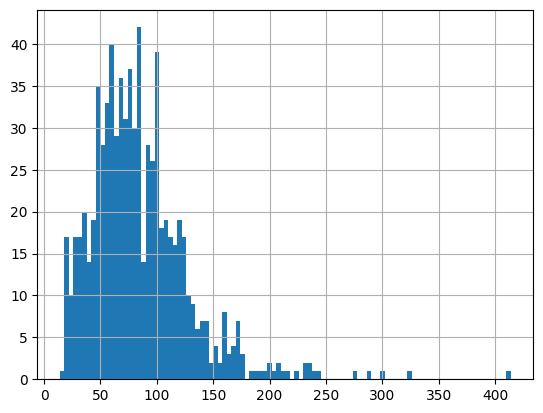

In [ ]:
rentals.Space.hist(bins=100)

In [ ]:
rentals = rentals[(rentals.Rent<=3000)&(rentals.Space<=150)]

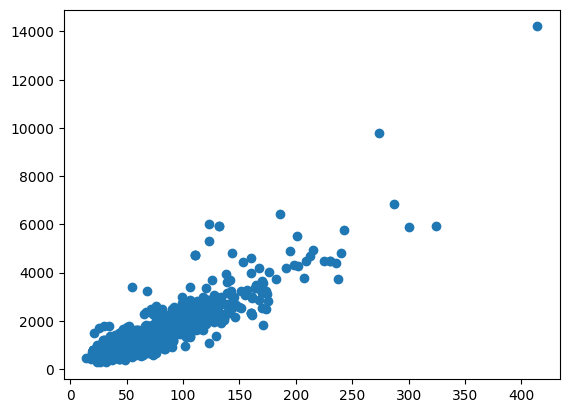

In [ ]:
# plot the filtered data
plt.scatter(rentals.Space, rentals.Rent)

In [ ]:
# apply the Pearson Correlation Test
correlation, pvalue = pearsonr(rentals.Space, rentals.Rent)
correlation, pvalue

(0.8556828356884562, 3.3758380773110417e-220)